<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS767/blob/main/Assignment3_767_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense
from keras.activations import relu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from keras import backend as K
from keras.regularizers import l2

In [4]:
df = pd.read_csv("./Assignment_3_Hitters.csv")
df.rename( columns={'Unnamed: 0':'hitter_name'}, inplace=True )

df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], prefix=["League_is", "Division_is", "NewLeague"] )

X_train = df.loc[~df.isnull().any(axis=1), ~df.columns.isin(['Salary', 'hitter_name'])]
y_train = df.loc[~df.isnull().any(axis=1), ['Salary']]
X_test = df.loc[df.isnull().any(axis=1), ~df.columns.isin(['Salary', 'hitter_name'])]


In [5]:
number_of_features = len(X_train.columns.values)
final_output = []

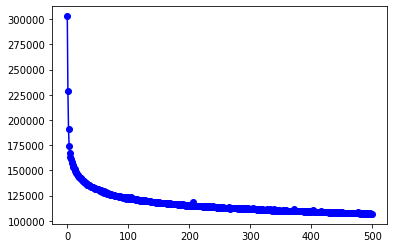

In [64]:
model = Sequential([
                    # Dense(30, input_dim=22, activation='relu'),
                    Dense(1, input_dim=22, activation='relu', kernel_regularizer=l2(0.05), bias_regularizer=l2(0.05))
])
model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
K.set_value(model.optimizer.learning_rate, 0.001)
hist = model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=0)
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]

plt.plot(hist.history['loss'], marker='o', color='b')
plt.show()

In [45]:
trained_weight = trained_weight.transpose()


In [46]:
pd.DataFrame(trained_weight, columns=[*X_train.columns.values])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_is_A,League_is_N,Division_is_E,Division_is_W,NewLeague_A,NewLeague_N
0,-0.027659,1.116345,0.66712,0.834015,0.440291,0.611493,-0.062699,0.133956,-0.425182,0.295638,0.385982,0.334227,-0.308422,0.3104,0.04637,-0.522536,-0.43954,-0.080477,1.421864,-1.508916,0.087125,-0.05966
